In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [70]:
df = pd.read_csv('/Users/hectorrojasvilla/Downloads/movies.csv')

In [10]:
#let`s look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [12]:
# veamos si nos faltan datos en las diferentes columnas 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {} %'.format(col, pct_missing))

name - 0.0 %
rating - 0.010041731872717789 %
genre - 0.0 %
year - 0.0 %
released - 0.0002608242044861763 %
score - 0.0003912363067292645 %
votes - 0.0003912363067292645 %
director - 0.0 %
writer - 0.0003912363067292645 %
star - 0.00013041210224308815 %
country - 0.0003912363067292645 %
budget - 0.2831246739697444 %
gross - 0.02464788732394366 %
company - 0.002217005738132499 %
runtime - 0.0005216484089723526 %


In [14]:
# ver que tipos de datos tenemos en las columnas 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [74]:
# se cambiaran tipos de datos en las columnas que tienen float64 por int64 para una mejor visualizacion 
df.fillna(0, inplace=True)

df['budget'] = df['budget'].astype ('int64')

df['gross'] = df['gross'].astype ('int64')

In [92]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0       1980   
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0       1980   
4   39846344      Orion Pictures     98.0        1980

In [93]:
# crear una columna con el año correcto del lanzamiento 'realesed'

df['yearcorrect'] = df['released'].astype(str).str[8:13]

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0       1980   
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0       1980   
4   39846344      Orion Pictures     98.0        1980

In [31]:
df.sort_values(by = ['gross'], inplace = False, ascending = False) 

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [32]:
pd.set_option('display.max_rows', None )

In [36]:
# vamos a deshacernos de los datos duplicados 
df['company'] = df['company'].astype(str)
df['company'].drop_duplicates().sort_values(ascending= False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

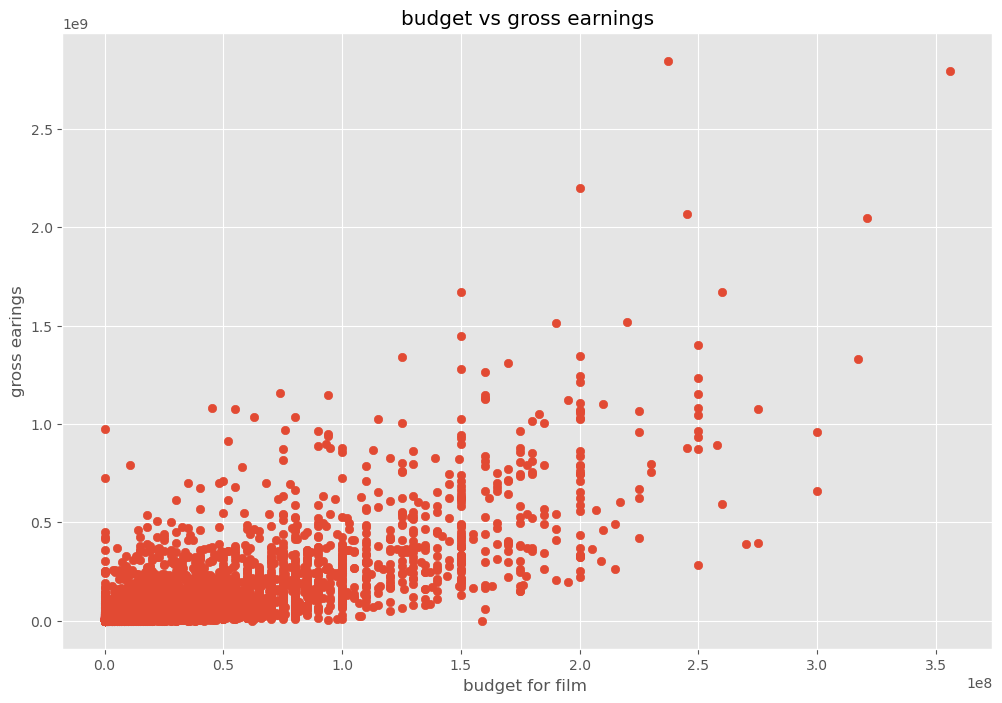

In [40]:
# budget high correlation 
# company high correlation 

# hagamos un scatter plot with budget and revenue 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('budget vs gross earnings')

plt.xlabel('budget for film ')

plt.ylabel('gross earings')

plt.show()

In [65]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False) 

<Axes: xlabel='budget', ylabel='gross'>

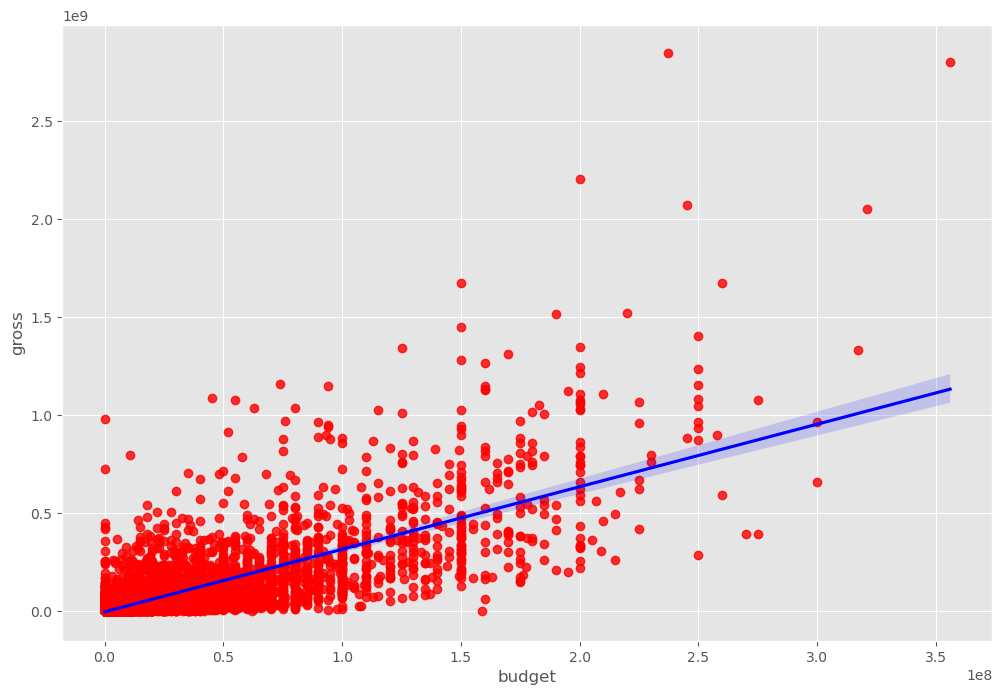

In [47]:
# plot budget vs gross usin seaborn 

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [55]:
# veamos un poco mas de cerca y con numeros la correlacion 

# Seleccionar las columnas específicas en las que deseas calcular la correlación
columnas_correlacion = ['gross', 'budget', 'score','runtime','votes']

# Crear un nuevo DataFrame solo con las columnas seleccionadas
df_seleccionado = df[columnas_correlacion]

# Calcular la correlación solo para las columnas seleccionadas
correlacion_columnas = df_seleccionado.corr()

correlacion_columnas

gross    budget     score   runtime     votes
gross    1.000000  0.750157  0.186012  0.244339  0.632870
budget   0.750157  1.000000  0.056863  0.268372  0.486931
score    0.186012  0.056863  1.000000  0.394564  0.407101
runtime  0.244339  0.268372  0.394564  1.000000  0.306984
votes    0.632870  0.486931  0.407101  0.306984  1.000000

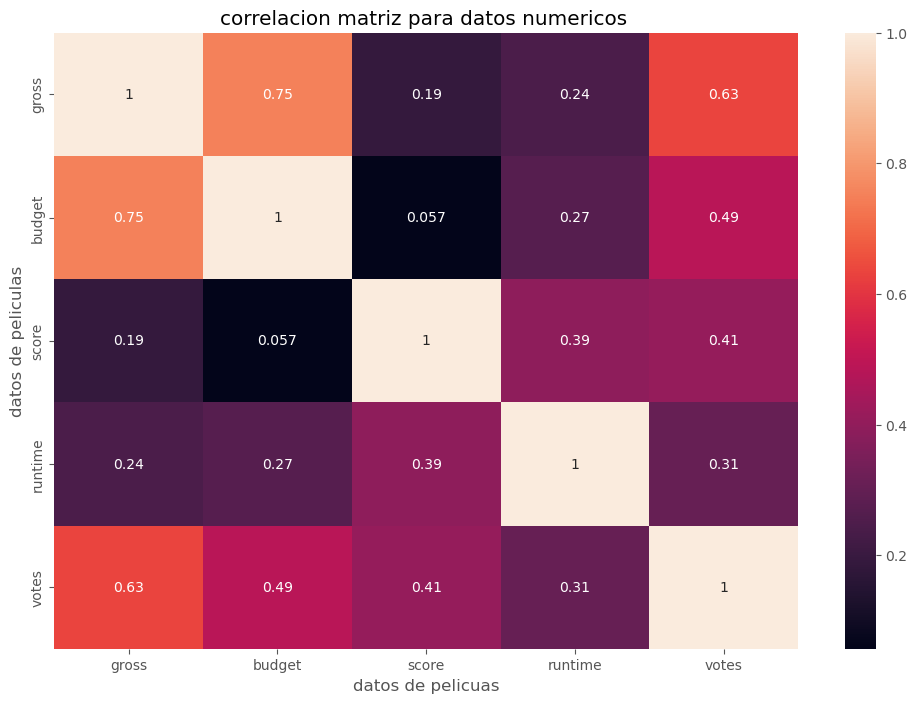

In [59]:
correlation_matrix = df_seleccionado.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlacion matriz para datos numericos ')

plt.xlabel('datos de pelicuas')

plt.ylabel('datos de peliculas')
plt.show()

In [94]:
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]=  df_numerized[col_name].astype('category')
        df_numerized[col_name]=  df_numerized[col_name].cat.codes

        
df_numerized.head()
        

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2  5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3   286       5      4  1980      1493    7.7   221000.0      1301    2001   
4  1027       7      4  1980      1544    7.3   108000.0      1054     522   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1048       55  19000000   46998772     2320    146.0           14  
1   328       56   4500000   58853106      732    104.0          134  
2  1746       56  18000000  538375067     1541    124.0           14  
3  2247       56   3500000   83453539     1813     88.0          134  
4   411       56   6000000   39846344     1778     98.0           14

In [95]:
df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0       1980   
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0       1980   
4   39846344      Orion Pictures     98.0        1980

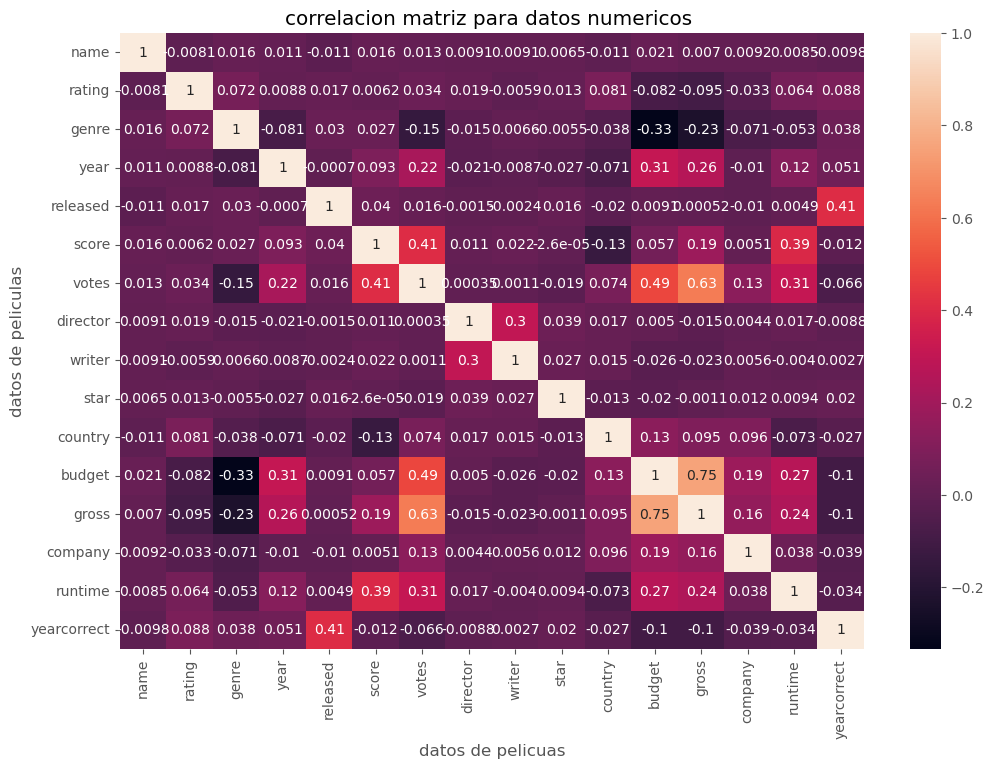

In [82]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlacion matriz para datos numericos ')

plt.xlabel('datos de pelicuas')

plt.ylabel('datos de peliculas')
plt.show()

In [84]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect -0.009832  0.087837  0.038468  0.050747  0.406841 -0.012436   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect -0.066091 -0.008823  0.002652  0.020218 -0.027316 -0.103521   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.008483    -0.009832  
rating      -0.095450 -0.032943  0.064133     0.087837  
genre       -0.234297 -0.071067 -0.052914     0.038468  
year         0.261900 -0.010431  0.116358     0.050747  
released     0.000519 -0.010474  0.004852     0.406841  
score        0.186012  0.005081  0.394564    -0.012436  
votes        0.632870  0.133457  0.306984    -0.066091  
director    -0.014916  0.004404  0.017062    -0.008823  
writer      -0.022997  0.005646 -0.004036     0.002652  
star        -0.001129  0.012442  0.009418     0.020218  
country      0.095325  0.095548 -0.073319    -0.027316  
budget       0.750157  0.186474  0.268372    -0.103521  
gross        1.000000  0.156745  0.244339    -0.102594  
company      0.156745  1.000000  0.037537    -0.039498  
runtime      0.244339  0.037537  1.000000    -0.033568  
yearcorrect -0.102594 -0.039498 -0.033568     1.000000

In [87]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect   -0.009832
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [89]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs 

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
country      score         -0.133346
score        country       -0.133346
budget       yearcorrect   -0.103521
yearcorrect  budget        -0.103521
             gross         -0.102594
gross        yearcorrect   -0.102594
rating       gross         -0.095450
gross        rating        -0.095450
rating       budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.073319
country      runtime       -0.073319
genre        company       -0.071067
company      genre         -0.071067
country      year          -0.070938
year         country       -0.070938
votes        yearcorrect   -0.066091
yearcorrect  votes         -0.066091
genre        runtime       -0.052914
r

In [91]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5 ]
high_corr

votes        gross          0.632870
gross        votes          0.632870
             budget         0.750157
budget       gross          0.750157
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64